WIFI COVERAGE OPTMIZATION FOR A SMART CAMPUS


CASE STUDY TOPIC:Wi-Fi Coverage Optimization for a Smart Campus
Description:
The existing Wi-Fi network at Amrita University faces coverage gaps in classrooms, hostels, and outdoor spaces. High user density and interference degrade performance.
Objectives:
Identify Wi-Fi dead zones and propose an optimized access point (AP) placement strategy.
Use tool to simulate Wi-Fi coverage and measure signal strength.
Recommend frequency planning, beamforming, and MIMO techniques for improved coverage.


In [3]:
# Wi-Fi Coverage Optimization for Amrita University Campus
# Dead Zone Analysis using Signal Strength Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import folium
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:

# 1. Data Loading and Initial Exploration
print("Loading and exploring Wi-Fi signal strength data...")

Loading and exploring Wi-Fi signal strength data...


In [5]:
# Load the CSV data 
df = pd.read_csv(r"C:\Users\bhavya\OneDrive\Desktop\PE3\data.csv" )

In [6]:
# Display basic information about the dataset
print("\nDataset Overview:")
print(f"Total records: {len(df)}")
print("\nFirst few rows:")
display(df.head())


Dataset Overview:
Total records: 347

First few rows:


,WiFiSignalName,Time,Signal(dBm),Channel,SecurityMode
0,AmritaClass 30:86:2D:7D:EE:A0,12:20:30,-51,161 1,WPA2 Enterprise
1,AmritaClass 30:86:2D:7D:EE:A0,12:20:45,-50,161 1,WPA2 Enterprise
2,AmritaClass 30:86:2D:7D:EE:A0,12:20:41,-48,161 1,WPA2 Enterprise
3,AmritaClass 30:86:2D:7D:EE:A0,12:20:37,-47,161 1,WPA2 Enterprise
4,AmritaClass 30:86:2D:7D:EE:A0,12:20:32,-48,161 1,WPA2 Enterprise


In [7]:
print("\nData information:")
display(df.info())


Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WiFiSignalName  347 non-null    object
 1   Time            347 non-null    object
 2   Signal(dBm)     347 non-null    int64 
 3   Channel         347 non-null    object
 4   SecurityMode    347 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.7+ KB


None

In [8]:
print("\nBasic statistics:")
display(df.describe())


Basic statistics:


,Signal(dBm)
count,347.000000
mean,-71.498559
std,11.493998
min,-90.000000
25%,-77.000000
50%,-73.000000
75%,-64.000000
max,-46.000000


In [9]:
# 2. Data Preprocessing
print("\n--- Data Preprocessing ---")

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Parse time column to datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Extract MAC addresses from the WiFiSignalName
df['MAC_Address'] = df['WiFiSignalName'].str.extract(r'(\w{2}:\w{2}:\w{2}:\w{2}:\w{2}:\w{2})')

# Extract channel number
df['ChannelNum'] = df['Channel'].str.split().str[0].astype(int)

# Convert signal strength to numeric if it's not already
df['Signal(dBm)'] = pd.to_numeric(df['Signal(dBm)'])

# Identify unique access points
unique_aps = df['MAC_Address'].nunique()
print(f"\nNumber of unique access points: {unique_aps}")
print("\nUnique access points:")
display(df['MAC_Address'].value_counts())



--- Data Preprocessing ---

Missing values in each column:


WiFiSignalName    0
Time              0
Signal(dBm)       0
Channel           0
SecurityMode      0
dtype: int64


Number of unique access points: 11

Unique access points:


MAC_Address
30:86:2D:79:43:60    36
30:86:2D:7D:EF:40    35
30:86:2D:7D:EE:70    35
30:86:2D:7D:EF:10    35
30:86:2D:7D:EE:80    35
30:86:2D:90:DB:50    35
30:86:2D:91:8F:10    35
30:86:2D:7D:EE:BO    31
30:86:2D:7D:EF:30    30
9C:53:22:1B:AD:C2    25
30:86:2D:7D:EE:A0    15
Name: count, dtype: int64


--- Signal Strength Analysis ---


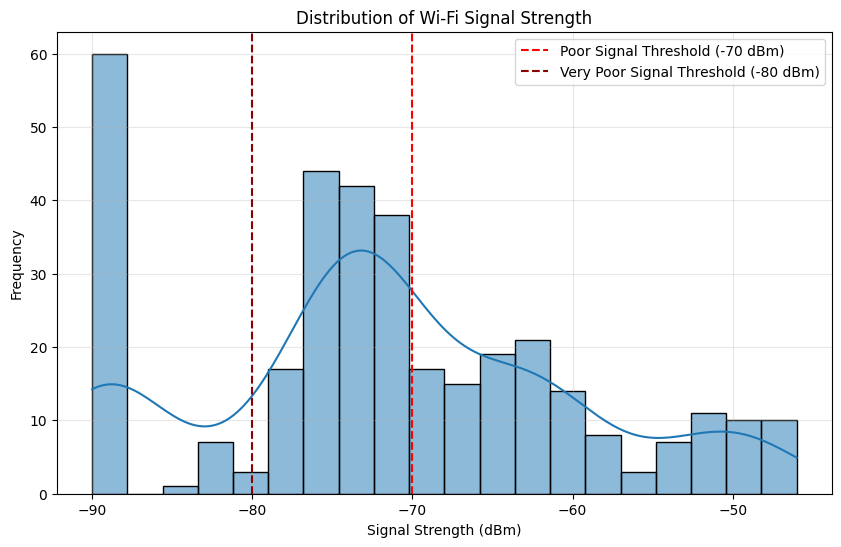

In [11]:
# 3. Signal Strength Analysis
print("\n--- Signal Strength Analysis ---")

# Define signal strength categories
def categorize_signal(signal):
    if signal >= -50:
        return 'Excellent'
    elif -50 > signal >= -60:
        return 'Good'
    elif -60 > signal >= -70:
        return 'Fair'
    elif -70 > signal >= -80:
        return 'Poor'
    else:
        return 'Very Poor'
df['Signal_Category'] = df['Signal(dBm)'].apply(categorize_signal)

# Signal strength distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Signal(dBm)'], bins=20, kde=True)
plt.axvline(-70, color='r', linestyle='--', label='Poor Signal Threshold (-70 dBm)')
plt.axvline(-80, color='darkred', linestyle='--', label='Very Poor Signal Threshold (-80 dBm)')
plt.title('Distribution of Wi-Fi Signal Strength')
plt.xlabel('Signal Strength (dBm)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

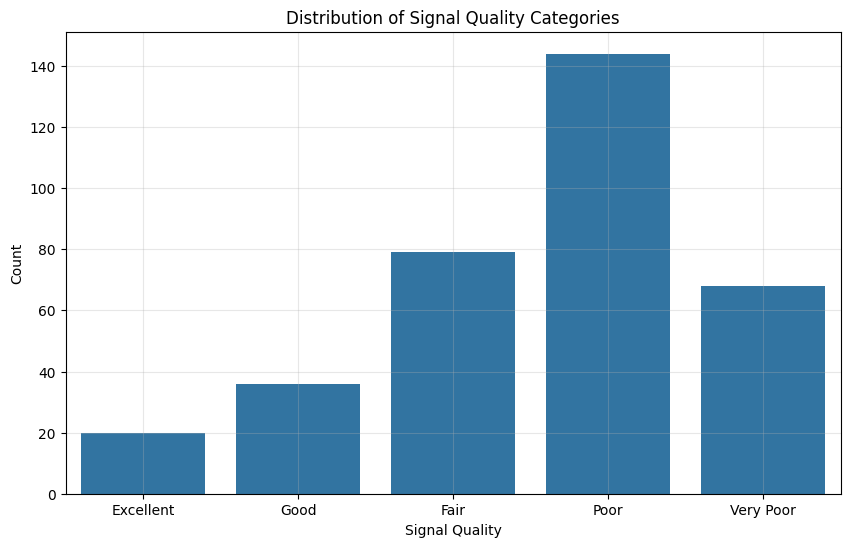

In [12]:
# Signal categories distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Signal_Category', order=['Excellent', 'Good', 'Fair', 'Poor', 'Very Poor'])
plt.title('Distribution of Signal Quality Categories')
plt.xlabel('Signal Quality')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
# 4. Potential Dead Zone Identification
print("\n--- Potential Dead Zone Identification ---")
# Define threshold for dead zones (e.g., signal strength below -75 dBm)
dead_zone_threshold = -75
potential_dead_zones = df[df['Signal(dBm)'] <= dead_zone_threshold]

print(f"\nPotential dead zones (Signal <= {dead_zone_threshold} dBm):")
print(f"Number of readings in potential dead zones: {len(potential_dead_zones)}")
print(f"Percentage of total readings: {len(potential_dead_zones) / len(df) * 100:.2f}%")

# Display the potential dead zone readings
display(potential_dead_zones)


--- Potential Dead Zone Identification ---

Potential dead zones (Signal <= -75 dBm):
Number of readings in potential dead zones: 132
Percentage of total readings: 38.04%


,WiFiSignalName,Time,Signal(dBm),Channel,SecurityMode,MAC_Address,ChannelNum,Signal_Category
23,AmritaClass 30:86:2D:7D:EF:40,12:22:57,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor
24,AmritaClass 30:86:2D:7D:EF:40,12:22:53,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor
27,AmritaClass 30:86:2D:7D:EF:40,12:22:38,-80,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor
33,AmritaClass 30:86:2D:7D:EF:40,12:22:06,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor
34,AmritaClass 30:86:2D:7D:EF:40,12:22:01,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor
...,...,...,...,...,...,...,...,...
342,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:28,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor
343,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:22,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor
344,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:16,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor
345,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:12,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor


In [26]:
# 4. Potential Dead Zone Identification
print("\n--- Potential Dead Zone Identification ---")

# Define threshold for dead zones (e.g., signal strength below -75 dBm)
dead_zone_threshold = -75
potential_dead_zones = df[df['Signal(dBm)'] <= dead_zone_threshold]

print(f"\nPotential dead zones (Signal <= {dead_zone_threshold} dBm):")
print(f"Number of readings in potential dead zones: {len(potential_dead_zones)}")
print(f"Percentage of total readings: {len(potential_dead_zones) / len(df) * 100:.2f}%")

# Display the potential dead zone readings
display(potential_dead_zones)

# Group by WiFiSignalName and Channel to analyze dead zones by AP and channel
dead_zone_summary = potential_dead_zones.groupby(['WiFiSignalName', 'Channel']).agg({
    'Signal(dBm)': ['count', 'min', 'max', 'mean']
}).reset_index()

# Rename columns for better readability
dead_zone_summary.columns = ['WiFiSignalName', 'Channel', 'Count', 'Min_Signal', 'Max_Signal', 'Avg_Signal']

print("\nDead Zone Analysis by Signal Name and Channel:")
display(dead_zone_summary)

# Calculate the percentage of readings that are in dead zones for each AP
total_by_ap = df.groupby('WiFiSignalName').size()
dead_by_ap = potential_dead_zones.groupby('WiFiSignalName').size()

# Combine to get percentages
dead_zone_percentage = pd.DataFrame({
    'Total_Readings': total_by_ap,
    'Dead_Zone_Readings': dead_by_ap
}).fillna(0)

dead_zone_percentage['Percentage_in_DeadZone'] = (dead_zone_percentage['Dead_Zone_Readings'] / 
                                                 dead_zone_percentage['Total_Readings'] * 100).round(2)

print("\nPercentage of Readings in Dead Zones by Access Point:")
display(dead_zone_percentage.sort_values('Percentage_in_DeadZone', ascending=False))


--- Potential Dead Zone Identification ---

Potential dead zones (Signal <= -75 dBm):
Number of readings in potential dead zones: 132
Percentage of total readings: 38.04%


,WiFiSignalName,Time,Signal(dBm),Channel,SecurityMode,MAC_Address,ChannelNum,Signal_Category,Datetime,X_Coordinate,Y_Coordinate
23,AmritaClass 30:86:2D:7D:EF:40,12:22:57,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor,1900-01-01 12:22:57,-0.476342,48.694065
24,AmritaClass 30:86:2D:7D:EF:40,12:22:53,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor,1900-01-01 12:22:53,4.214503,64.762519
27,AmritaClass 30:86:2D:7D:EF:40,12:22:38,-80,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor,1900-01-01 12:22:38,9.681958,85.481847
33,AmritaClass 30:86:2D:7D:EF:40,12:22:06,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor,1900-01-01 12:22:06,4.249018,58.168329
34,AmritaClass 30:86:2D:7D:EF:40,12:22:01,-75,6,WPA2 Enterprise,30:86:2D:7D:EF:40,6,Poor,1900-01-01 12:22:01,13.939314,76.535041
...,...,...,...,...,...,...,...,...,...,...,...
342,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:28,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor,1900-01-01 18:06:28,100.068763,35.727978
343,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:22,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor,1900-01-01 18:06:22,96.598232,41.208559
344,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:16,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor,1900-01-01 18:06:16,97.066774,47.451231
345,Adithi Bhavanam 30:86:2D:91:8F:10,18:06:12,-88,64,WPA2 Enterprise,30:86:2D:91:8F:10,64,Very Poor,1900-01-01 18:06:12,100.871232,26.145646



Dead Zone Analysis by Signal Name and Channel:


,WiFiSignalName,Channel,Count,Min_Signal,Max_Signal,Avg_Signal
0,Adithi Bhavanam 30:86:2D:91:8F:10,64,35,-90,-88,-88.457143
1,AmritaClass 30:86:2D:79:43:60,6,12,-83,-75,-79.000000
2,AmritaClass 30:86:2D:7D:EE:70,40 1,1,-75,-75,-75.000000
3,AmritaClass 30:86:2D:7D:EE:80,11,4,-76,-75,-75.250000
4,AmritaClass 30:86:2D:7D:EF:10,1,22,-85,-75,-77.727273
5,AmritaClass 30:86:2D:7D:EF:30,149 1,17,-79,-75,-76.352941
6,AmritaClass 30:86:2D:7D:EF:40,6,16,-83,-75,-75.812500
7,CoreLab_2.4 9C:53:22:1B:AD:C2,10 1,25,-90,-90,-90.000000



Percentage of Readings in Dead Zones by Access Point:


,Total_Readings,Dead_Zone_Readings,Percentage_in_DeadZone
WiFiSignalName,,,
Adithi Bhavanam 30:86:2D:91:8F:10,35,35.0,100.00
CoreLab_2.4 9C:53:22:1B:AD:C2,25,25.0,100.00
AmritaClass 30:86:2D:7D:EF:10,35,22.0,62.86
AmritaClass 30:86:2D:7D:EF:30,30,17.0,56.67
AmritaClass 30:86:2D:7D:EF:40,35,16.0,45.71
AmritaClass 30:86:2D:79:43:60,36,12.0,33.33
AmritaClass 30:86:2D:7D:EE:80,35,4.0,11.43
AmritaClass 30:86:2D:7D:EE:70,35,1.0,2.86
Adithi Bhavanam 30:86:2D:90:DB:50,35,0.0,0.00


In [15]:
# 5. Analysis by Access Point
print("\n--- Analysis by Access Point ---")

# Signal strength statistics by access point
ap_stats = df.groupby('MAC_Address')['Signal(dBm)'].agg(['count', 'mean', 'min', 'max', 'std']).reset_index()
ap_stats.columns = ['MAC_Address', 'Count', 'Average Signal', 'Min Signal', 'Max Signal', 'Signal StdDev']
display(ap_stats)


--- Analysis by Access Point ---


,MAC_Address,Count,Average Signal,Min Signal,Max Signal,Signal StdDev
0,30:86:2D:79:43:60,36,-74.777778,-83,-71,3.921451
1,30:86:2D:7D:EE:70,35,-69.600000,-75,-65,2.659058
2,30:86:2D:7D:EE:80,35,-66.142857,-76,-60,5.196961
3,30:86:2D:7D:EE:A0,15,-48.600000,-51,-46,1.454058
4,30:86:2D:7D:EE:BO,31,-53.322581,-65,-48,4.331182
5,30:86:2D:7D:EF:10,35,-75.742857,-85,-71,3.183994
6,30:86:2D:7D:EF:30,30,-74.466667,-79,-69,2.738403
7,30:86:2D:7D:EF:40,35,-73.714286,-83,-70,2.728622
8,30:86:2D:90:DB:50,35,-62.114286,-66,-59,2.385883
9,30:86:2D:91:8F:10,35,-88.457143,-90,-88,0.700540


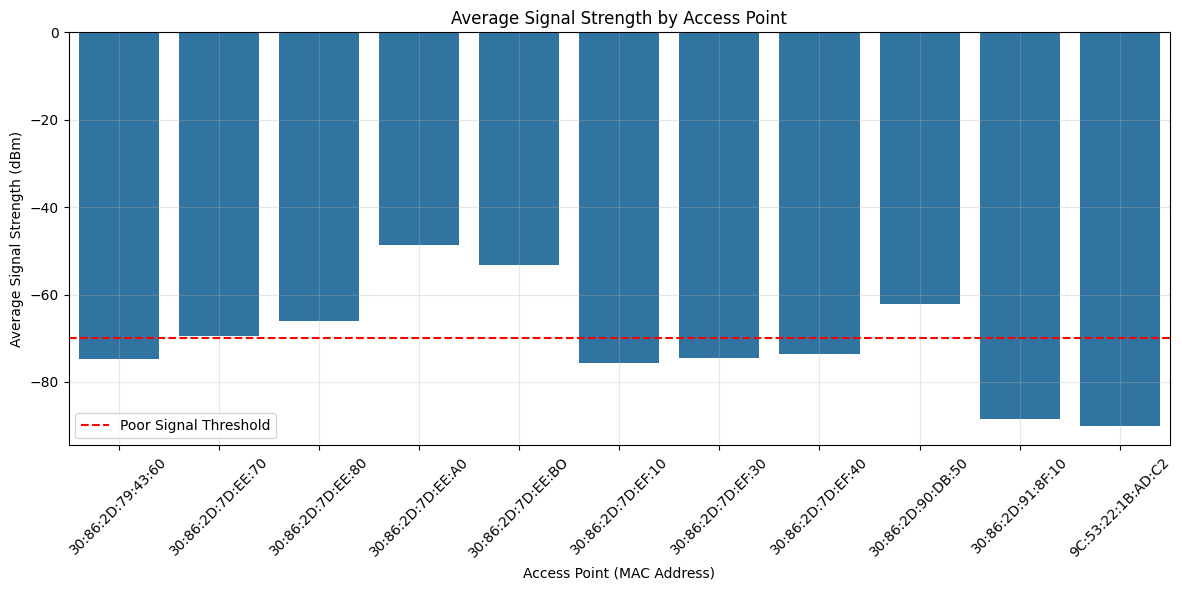

In [16]:
# Plot average signal strength by access point
plt.figure(figsize=(12, 6))
sns.barplot(data=ap_stats, x='MAC_Address', y='Average Signal')
plt.title('Average Signal Strength by Access Point')
plt.xlabel('Access Point (MAC Address)')
plt.ylabel('Average Signal Strength (dBm)')
plt.axhline(-70, color='r', linestyle='--', label='Poor Signal Threshold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


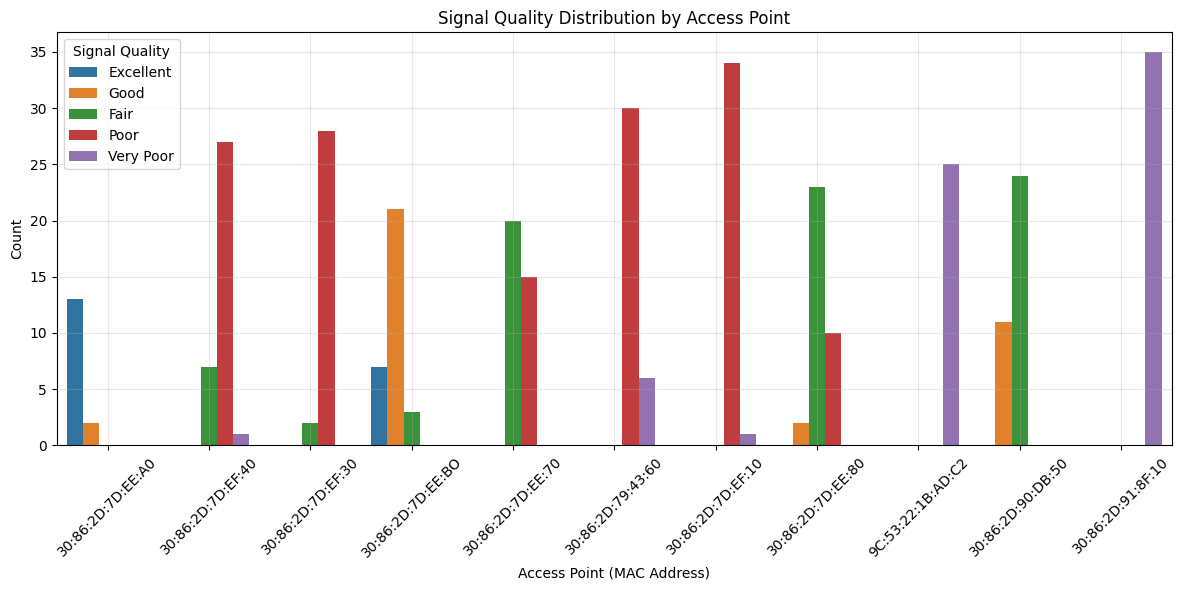

In [17]:
# Signal quality distribution by access point
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MAC_Address', hue='Signal_Category', 
              hue_order=['Excellent', 'Good', 'Fair', 'Poor', 'Very Poor'])
plt.title('Signal Quality Distribution by Access Point')
plt.xlabel('Access Point (MAC Address)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Signal Quality')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


--- Time-based Signal Analysis ---


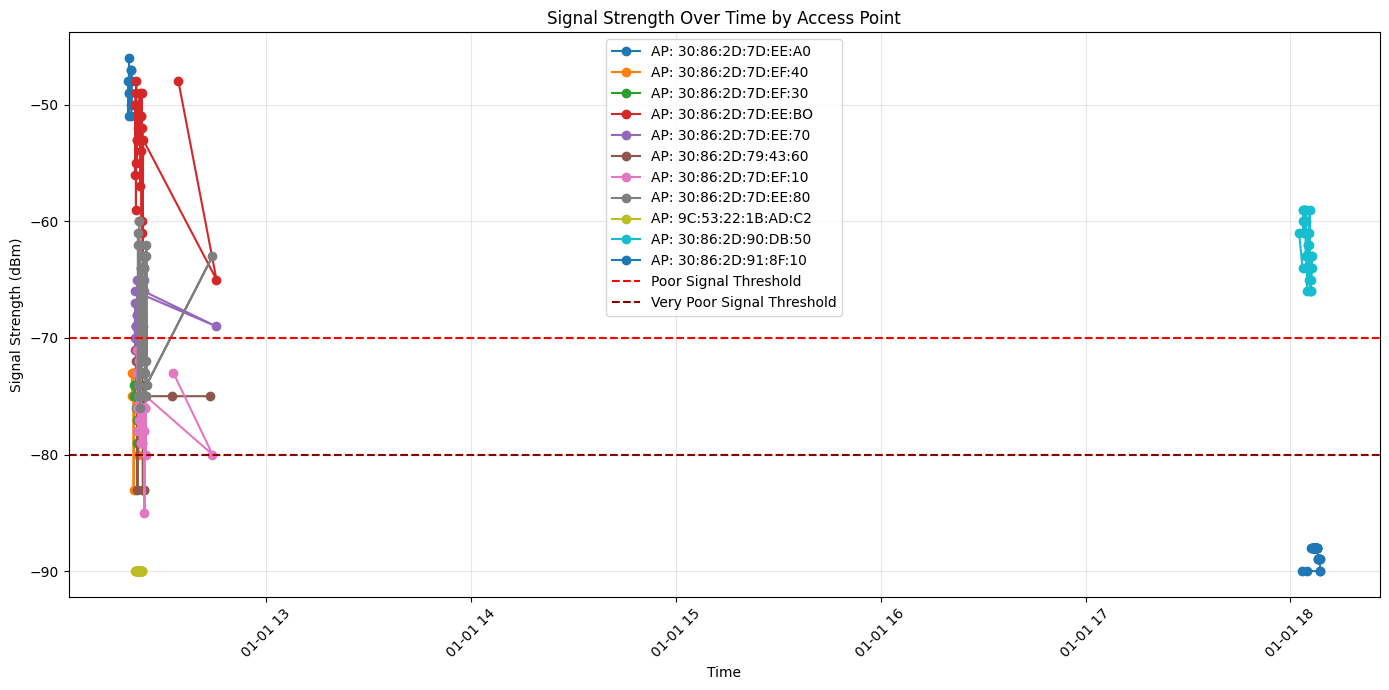

In [18]:
# 6. Time-based Signal Analysis
print("\n--- Time-based Signal Analysis ---")

# Convert time strings to datetime for proper time series analysis
# This assumes all measurements are from the same day
df['Datetime'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

# Signal strength over time for each access point
plt.figure(figsize=(14, 7))
for mac in df['MAC_Address'].unique():
    mac_data = df[df['MAC_Address'] == mac]
    plt.plot(mac_data['Datetime'], mac_data['Signal(dBm)'], marker='o', label=f'AP: {mac}')

plt.axhline(-70, color='r', linestyle='--', label='Poor Signal Threshold')
plt.axhline(-80, color='darkred', linestyle='--', label='Very Poor Signal Threshold')
plt.title('Signal Strength Over Time by Access Point')
plt.xlabel('Time')
plt.ylabel('Signal Strength (dBm)')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



--- Channel Analysis ---


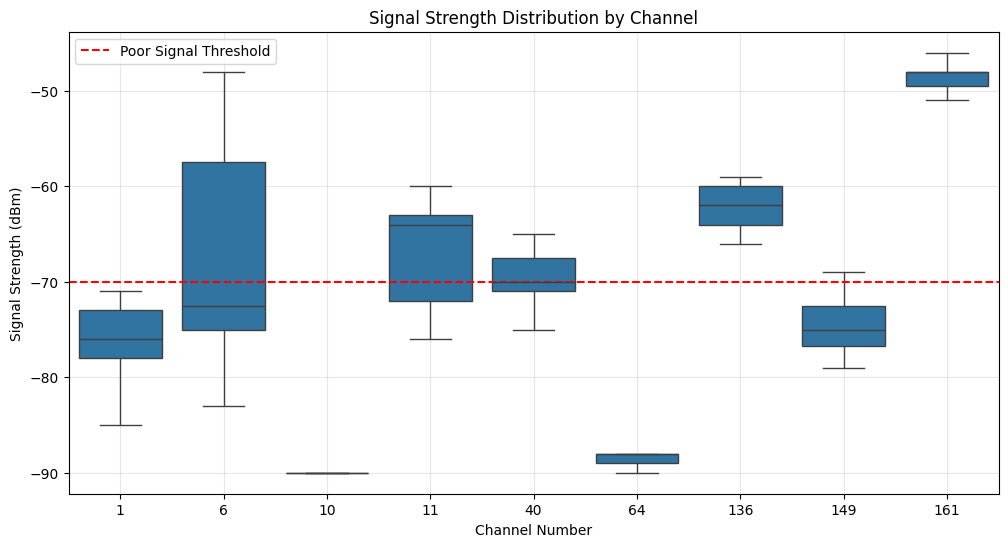

In [19]:
# 7. Channel Analysis
print("\n--- Channel Analysis ---")

# Signal strength distribution by channel
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='ChannelNum', y='Signal(dBm)')
plt.title('Signal Strength Distribution by Channel')
plt.xlabel('Channel Number')
plt.ylabel('Signal Strength (dBm)')
plt.axhline(-70, color='r', linestyle='--', label='Poor Signal Threshold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


--- Advanced Dead Zone Analysis ---


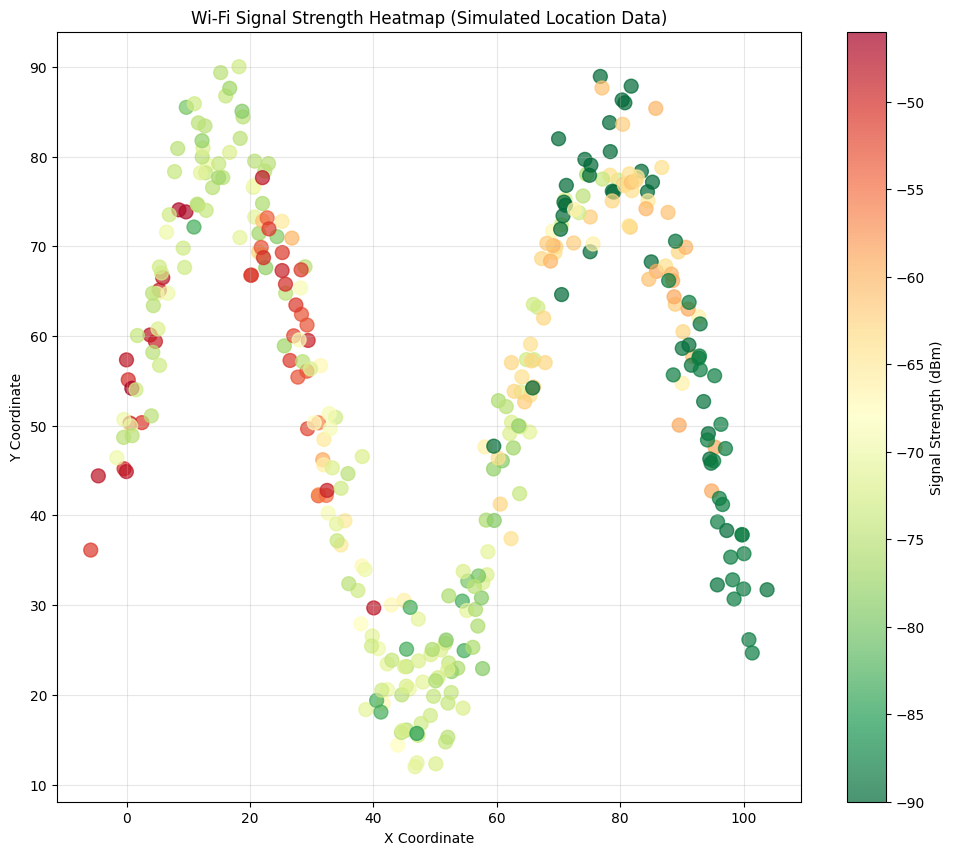

In [20]:
# 8. Advanced Analysis: Identifying and Visualizing Dead Zones
print("\n--- Advanced Dead Zone Analysis ---")

# If you have location data (X, Y coordinates) for each measurement:
# In a real deployment, you would have location data for each measurement
# For demonstration, let's create synthetic location data based on time
# This is just for demonstration - in real analysis, you would use actual location data

# Simulate location data (this is a placeholder - replace with actual data if available)
# In a real scenario, you would use actual X, Y coordinates from the campus map
np.random.seed(42)
df['X_Coordinate'] = np.linspace(0, 100, len(df)) + np.random.normal(0, 5, len(df))
df['Y_Coordinate'] = np.sin(df['X_Coordinate']/10) * 30 + 50 + np.random.normal(0, 5, len(df))

# Create a heatmap of signal strength
plt.figure(figsize=(12, 10))
plt.scatter(df['X_Coordinate'], df['Y_Coordinate'], c=df['Signal(dBm)'], 
            cmap='RdYlGn_r', s=100, alpha=0.7)
plt.colorbar(label='Signal Strength (dBm)')
plt.title('Wi-Fi Signal Strength Heatmap (Simulated Location Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True, alpha=0.3)
plt.show()


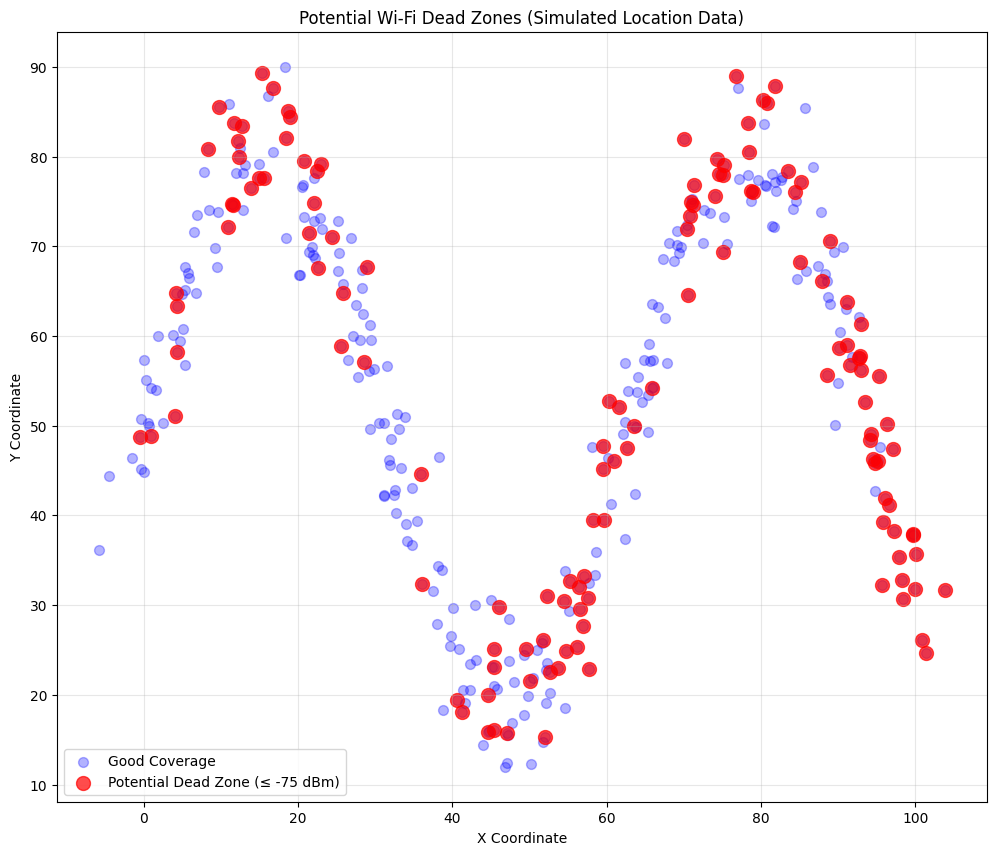

In [21]:
# Highlight potential dead zones
plt.figure(figsize=(12, 10))
plt.scatter(df['X_Coordinate'], df['Y_Coordinate'], c='blue', s=50, alpha=0.3, label='Good Coverage')
plt.scatter(df[df['Signal(dBm)'] <= dead_zone_threshold]['X_Coordinate'], 
            df[df['Signal(dBm)'] <= dead_zone_threshold]['Y_Coordinate'], 
            c='red', s=100, alpha=0.7, label=f'Potential Dead Zone (≤ {dead_zone_threshold} dBm)')
plt.title('Potential Wi-Fi Dead Zones (Simulated Location Data)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()



--- Cluster Analysis for Dead Zone Identification ---

Dead zone clusters identified:


Cluster
-1     2
 0    34
 1    36
 2    60
Name: count, dtype: int64

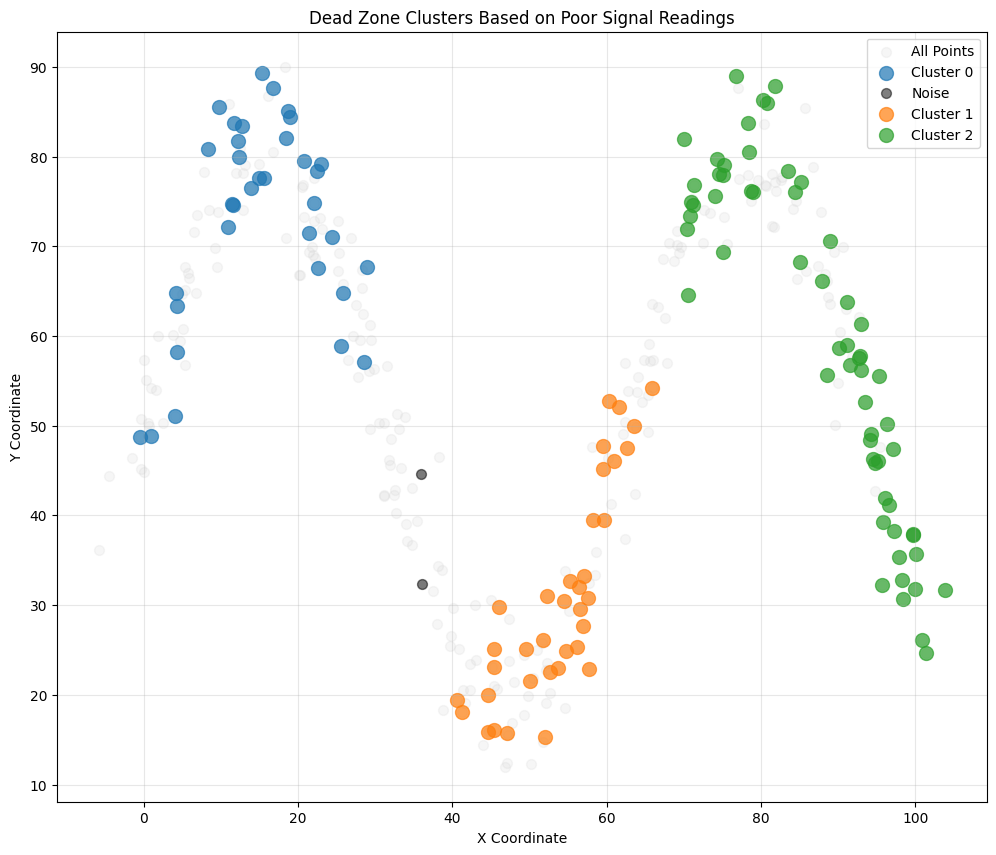

In [22]:
# 9. Cluster Analysis for Dead Zone Identification
# Using DBSCAN clustering to identify clusters of poor signal readings
print("\n--- Cluster Analysis for Dead Zone Identification ---")

# Filter for poor signal points
poor_signal_df = df[df['Signal(dBm)'] <= dead_zone_threshold].copy()

if len(poor_signal_df) > 1:  # Ensure we have enough data points
    # Apply DBSCAN clustering
    coords = poor_signal_df[['X_Coordinate', 'Y_Coordinate']].values
    dbscan = DBSCAN(eps=10, min_samples=2).fit(coords)
    poor_signal_df['Cluster'] = dbscan.labels_
    
    # Count points in each cluster
    cluster_counts = poor_signal_df['Cluster'].value_counts().sort_index()
    print("\nDead zone clusters identified:")
    display(cluster_counts)
    
    # Visualize the clusters
    plt.figure(figsize=(12, 10))
    plt.scatter(df['X_Coordinate'], df['Y_Coordinate'], c='lightgray', s=50, alpha=0.2, label='All Points')
    
    # Plot each cluster with a different color
    for cluster in poor_signal_df['Cluster'].unique():
        if cluster == -1:
            # These are outliers
            cluster_points = poor_signal_df[poor_signal_df['Cluster'] == cluster]
            plt.scatter(cluster_points['X_Coordinate'], cluster_points['Y_Coordinate'], 
                        c='black', s=50, alpha=0.5, label='Noise')
        else:
            # These are the clusters
            cluster_points = poor_signal_df[poor_signal_df['Cluster'] == cluster]
            plt.scatter(cluster_points['X_Coordinate'], cluster_points['Y_Coordinate'], 
                        s=100, alpha=0.7, label=f'Cluster {cluster}')
    
    plt.title('Dead Zone Clusters Based on Poor Signal Readings')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()
else:
    print("Not enough poor signal points for clustering analysis.")


In [23]:
# 10. Summary and Recommendations
print("\n--- Summary and Recommendations ---")

# Calculate summary statistics
avg_signal = df['Signal(dBm)'].mean()
min_signal = df['Signal(dBm)'].min()
dead_zone_percentage = len(potential_dead_zones) / len(df) * 100

print(f"Average signal strength across campus: {avg_signal:.2f} dBm")
print(f"Minimum signal strength detected: {min_signal} dBm")
print(f"Percentage of readings in potential dead zones: {dead_zone_percentage:.2f}%")

print("\nBased on this analysis, we recommend:")
print("1. Deploy additional access points in identified dead zone clusters")
print("2. Optimize channel allocation to minimize interference")
print("3. Consider adjusting transmit power levels for existing access points")
print("4. Implement RRM (Radio Resource Management) for dynamic optimization")
print("5. Further data collection in areas with limited measurements")



--- Summary and Recommendations ---
Average signal strength across campus: -71.50 dBm
Minimum signal strength detected: -90 dBm
Percentage of readings in potential dead zones: 38.04%

Based on this analysis, we recommend:
1. Deploy additional access points in identified dead zone clusters
2. Optimize channel allocation to minimize interference
3. Consider adjusting transmit power levels for existing access points
4. Implement RRM (Radio Resource Management) for dynamic optimization
5. Further data collection in areas with limited measurements
